In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import bench
import display

from string import digits
from os import listdir
from os.path import isfile, join, getsize

%load_ext autoreload
%autoreload 2

onlyfiles = [f for f in listdir('out/') if isfile(join('out/', f))]
app_grid = [f for f in onlyfiles if re.search('app_grid',f)]
app_grid.append("app_grid_3layers_reference.txt")
app_grid.append("app_grid_4layers_reference.txt")

cs_grid = [f for f in onlyfiles if re.search('cs_grid',f)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
app = bench.AppDelay([f"out/{i}" for i in app_grid])
print(app.data_.columns)
app.data_

Index(['Time', 'Node', 'AppId', 'SeqNo', 'Type', 'DelayS', 'DelayUS',
       'RetxCount', 'HopCount', 'source', 'NodeType', 'NodeNumber', 'Cache',
       'CacheCapacity', 'CacheStrategy', 'Layers'],
      dtype='object')


,Time,Node,AppId,SeqNo,Type,DelayS,DelayUS,RetxCount,HopCount,source,NodeType,NodeNumber,Cache,CacheCapacity,CacheStrategy,Layers
0,2.05340,csm1,0,5.0,Last,0.003397,3396.58,1.0,1.0,app_grid_3layers_random_2000.txt,csm,1,random,2000,everywhere,3
1,2.05340,csm1,0,5.0,Full,0.003397,3396.58,1.0,1.0,app_grid_3layers_random_2000.txt,csm,1,random,2000,everywhere,3
2,2.15167,csm1,0,15.0,Last,0.001672,1671.56,1.0,1.0,app_grid_3layers_random_2000.txt,csm,1,random,2000,everywhere,3
3,2.15167,csm1,0,15.0,Full,0.001672,1671.56,1.0,1.0,app_grid_3layers_random_2000.txt,csm,1,random,2000,everywhere,3
4,2.55205,csm1,0,50.0,Last,0.002046,2045.95,1.0,1.0,app_grid_3layers_random_2000.txt,csm,1,random,2000,everywhere,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7644,30.91740,csm22,0,81.0,Last,0.577379,577379.00,1.0,1.0,app_grid_3layers_fifo_15.txt,csm,22,fifo,15,everywhere,3
7645,30.91740,csm22,0,81.0,Full,7.057380,7057380.00,3.0,1.0,app_grid_3layers_fifo_15.txt,csm,22,fifo,15,everywhere,3
7646,30.94040,csm14,0,356.0,Last,1.880370,1880370.00,1.0,1.0,app_grid_3layers_fifo_15.txt,csm,14,fifo,15,everywhere,3
7647,30.94040,csm14,0,356.0,Full,10.110400,10110400.00,3.0,1.0,app_grid_3layers_fifo_15.txt,csm,14,fifo,15,everywhere,3


In [63]:
app.data_["Interval"] = app.data_["Time"] // 5
app.data_["Layers"] == "3"

0       True
1       True
2       True
3       True
4       True
        ... 
7644    True
7645    True
7646    True
7647    True
7648    True
Name: Layers, Length: 489097, dtype: bool

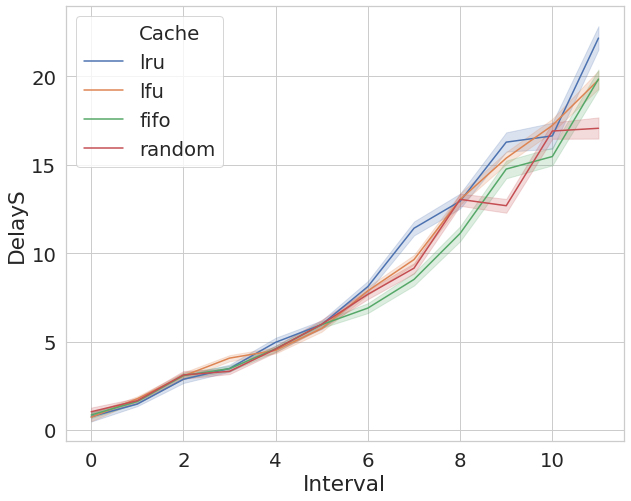

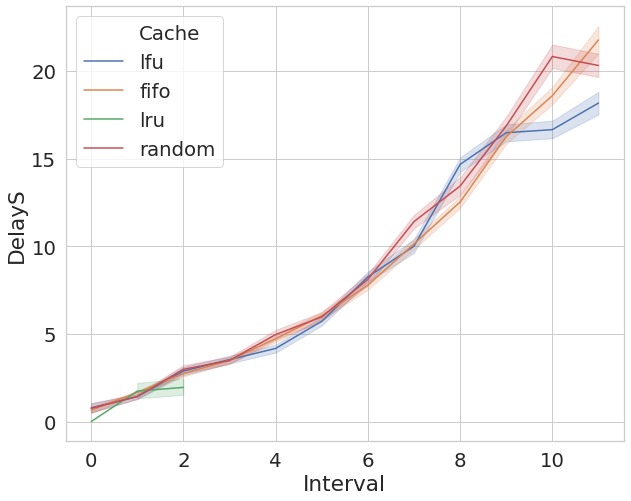

In [71]:
sns.set(font_scale=1.8)
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.lineplot(x = "Interval", y = "DelayS", hue = "Cache", data = app.data_[
    (app.data_["CacheCapacity"] == "15") & 
    (app.data_["CacheStrategy"] == "everywhere") &
    (app.data_["Type"] == "Full")
])
plt.show()

plt.figure(figsize=(10,8))
sns.lineplot(x = "Interval", y = "DelayS", hue = "Cache", data = app.data_[
    (app.data_["CacheCapacity"] == "15") & 
    (app.data_["CacheStrategy"] == "fog") &
    (app.data_["Type"] == "Full")
])
plt.show()
